# Nota no ENEM x IDHM

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
mediaEnemPorMunicipio = pd.read_csv("mediaEnemPorMunicipio.csv", sep=",", index_col=0)
#aqui eu importo o data frame e informo que não quero que ele crie a coluna de indice visto que a mesma ja foi criado no momento da exportação

In [7]:
mediaEnemPorMunicipio.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [11]:
atlasHumano = pd.read_csv('D:/Projetos/dadosBrutos/idhm municipios 2010.csv')

In [12]:
atlasHumano.head()

,codMunicipio,Município,Estado,IDHM,IDHM_R,IDHM_L,IDHM_E
0,5200050,Abadia de Goiás,GO,"0,708","0,687","0,83","0,622"
1,3100104,Abadia dos Dourados,MG,"0,689","0,693","0,839","0,563"
2,5200100,Abadiânia,GO,"0,689","0,671","0,841","0,579"
3,3100203,Abaeté,MG,"0,698","0,72","0,848","0,556"
4,1500107,Abaetetuba,PA,"0,628","0,579","0,798","0,537"


In [13]:
mediaEnemIDHM = pd.merge(mediaEnemPorMunicipio, atlasHumano, how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['codMunicipio'] )

In [14]:
mediaEnemIDHM.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,codMunicipio,Município,Estado,IDHM,IDHM_R,IDHM_L,IDHM_E
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,1100015,Alta Floresta D'Oeste,RO,"0,641","0,657","0,763","0,526"
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,1100023,Ariquemes,RO,"0,702","0,716","0,806","0,6"
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,1100031,Cabixi,RO,"0,65","0,65","0,757","0,559"
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,1100049,Cacoal,RO,"0,718","0,727","0,821","0,62"
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,1100056,Cerejeiras,RO,"0,692","0,688","0,799","0,602"


In [16]:
mediaEnemIDHM.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
codMunicipio                 int64
Município                   object
Estado                      object
IDHM                        object
IDHM_R                      object
IDHM_L                      object
IDHM_E                      object
dtype: object

In [31]:
mediaEnemIDHM['IDHM'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(",",".")))
mediaEnemIDHM['IDHM_R'] = mediaEnemIDHM['IDHM_R'].apply(lambda x: float(str(x).replace(",",".").replace('td>',"")))
mediaEnemIDHM['IDHM_L'] = mediaEnemIDHM['IDHM_L'].apply(lambda x: float(str(x).replace(",",".").replace('td>',"")))
mediaEnemIDHM['IDHM_E'] = mediaEnemIDHM['IDHM_E'].apply(lambda x: float(str(x).replace(",",".").replace('td>',"")))
#aqui uso a função lambda com o replace para converter cada registro de string em float trocando , por .
#caso contrário dará erro no gráfico

In [32]:
mediaEnemIDHM.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
codMunicipio                 int64
Município                   object
Estado                      object
IDHM                       float64
IDHM_R                     float64
IDHM_L                     float64
IDHM_E                     float64
dtype: object

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='IDHM'>

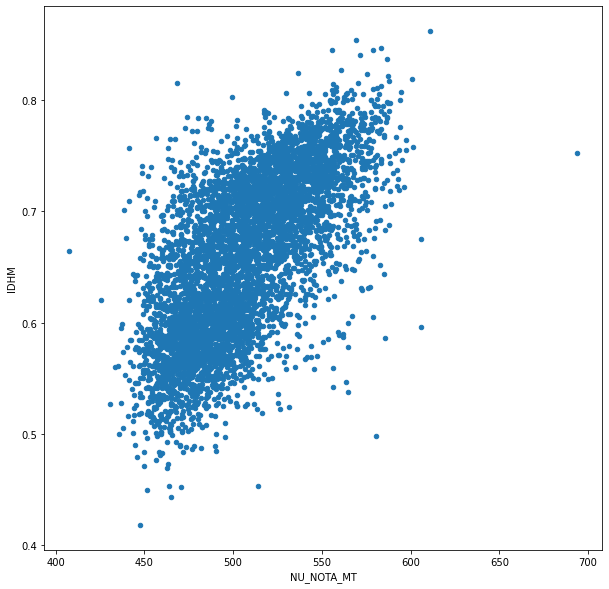

In [35]:
mediaEnemIDHM.plot.scatter('NU_NOTA_MT', 'IDHM', figsize=(10,10))
#aqui tenho um gráfico de disperção da Nota de Matémática vs o IDHM

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

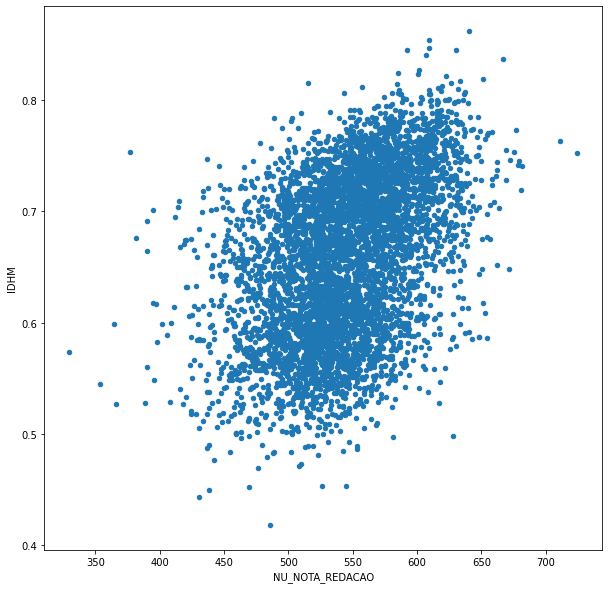

In [36]:
mediaEnemIDHM.plot.scatter('NU_NOTA_REDACAO', 'IDHM', figsize=(10,10))
#aqui tenho um gráfico de disperção da Nota de Redação vs o IDHM